<a href="https://colab.research.google.com/github/irodriguez0482/QR-Code-Based-Data-Retrieval-System/blob/main/Rodriguez_dsp_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DSP Exercise

We have a microcontroller sampling its analog input every 1 ms (Measure 1000 times per second).

The microcontroller software is described by
\begin{equation}
y[n] = 0.8 y[n-1] + 0.2 x[n]
\end{equation}
The variable corresponding to $y[-1]$ is set/initialized to 50.

The analog input signal is
\begin{equation}
x(t)=10 \cos(2 \pi 70 t)
\end{equation}

Plot $x[n]$, $y[n]$, and the output of the DAC, $y(t)$.

Note that $x(t)$ is before the ADC, $x[n]$ is after the ADC, $y[n]$ is before DAC, and $y(t)$ is after the DAC.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

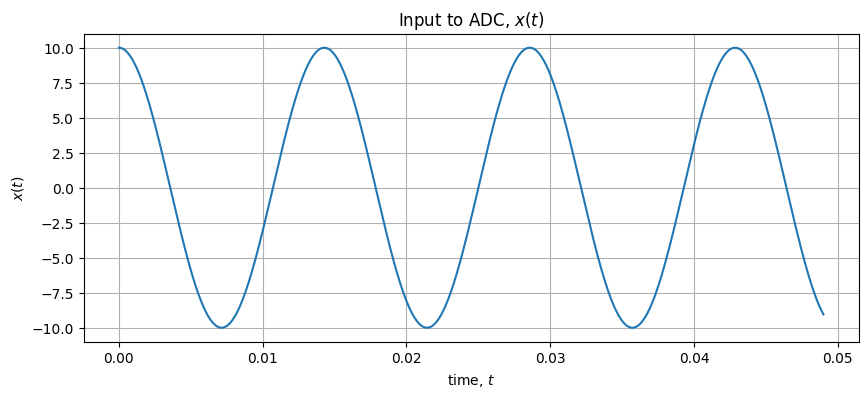

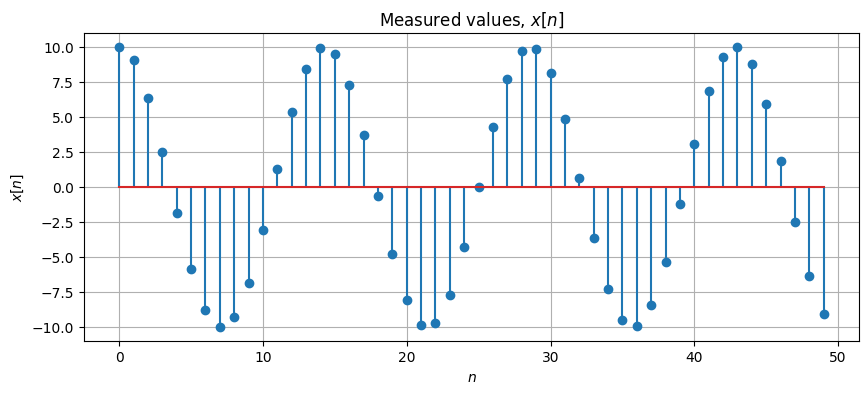

In [3]:
xa = lambda t: 10*np.cos(2*np.pi*70*t)
Ns = 50
Ts = 0.001

plt.figure(figsize=(10,4))
tvals = np.linspace(0, (Ns-1) * Ts, 1000)
xvals = xa(tvals)
plt.plot(tvals, xvals)
plt.grid(True)
plt.title('Input to ADC, $x(t)$')
plt.xlabel('time, $t$')
plt.ylabel('$x(t)$')
print()

x = xa(np.arange(Ns)*Ts)
plt.figure(figsize=(10,4))
plt.stem(x)
plt.grid(True)
plt.title('Measured values, $x[n]$')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')
print()

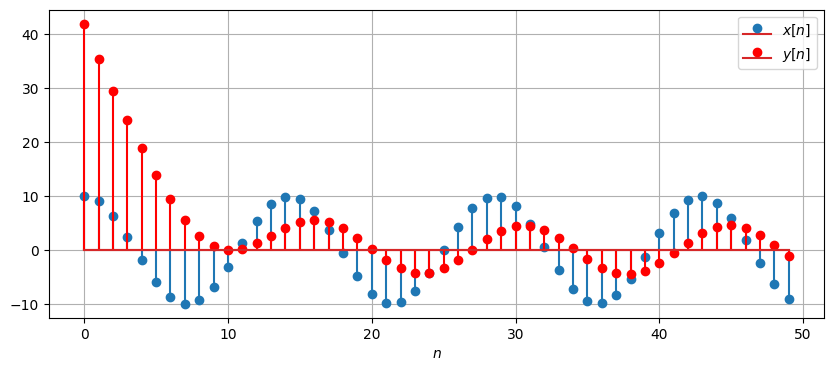

In [4]:
y = np.zeros(Ns)
y[0] = 0.8*50 + 0.2*10
for k in range(1,Ns):
  y[k] = 0.8*y[k-1] + 0.2*x[k]

plt.figure(figsize=(10,4))
plt.stem(x)
plt.stem(y, 'r')
plt.grid(True)
plt.legend(['$x[n]$','$y[n]$'])
plt.xlabel('$n$')
print()

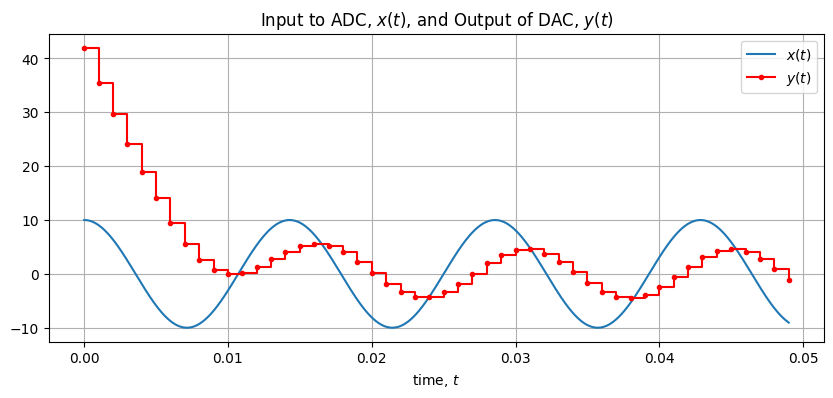

In [5]:
plt.figure(figsize=(10,4))
tvals = np.linspace(0, (Ns-1) * Ts, 1000)
xvals = xa(tvals)
plt.plot(tvals, xvals)
plt.grid(True)
plt.title('Input to ADC, $x(t)$, and Output of DAC, $y(t)$')
plt.xlabel('time, $t$')

plt.step(np.arange(Ns)*Ts, y, 'r.-', where='post')
plt.legend(['$x(t)$', '$y(t)$'])
print()


# Changes in the DAC output y(t)

The new impact on the system results in several changes. When we examine the new y[n] equation, we see that the updated signal places greater emphasis on the previous output compared to the current input. This increased dependence on previous outputs makes the system behave more like a low-pass filter.

Analyzing the frequency response of the new system, we observe that the higher coefficient for the previous term (0.8) compared to the current input (0.2) makes the system more effective at attenuating high-frequency components. This adjustment means the system will smooth out high-frequency noise more effectively but will also be slower to respond to rapid changes in x[n].

Looking at the plots of the new system, we can see that it applies stronger smoothing, which helps in filtering out high-frequency components. However, this improved filtering comes at the cost of a slower reaction to changes in the input signal x[n].